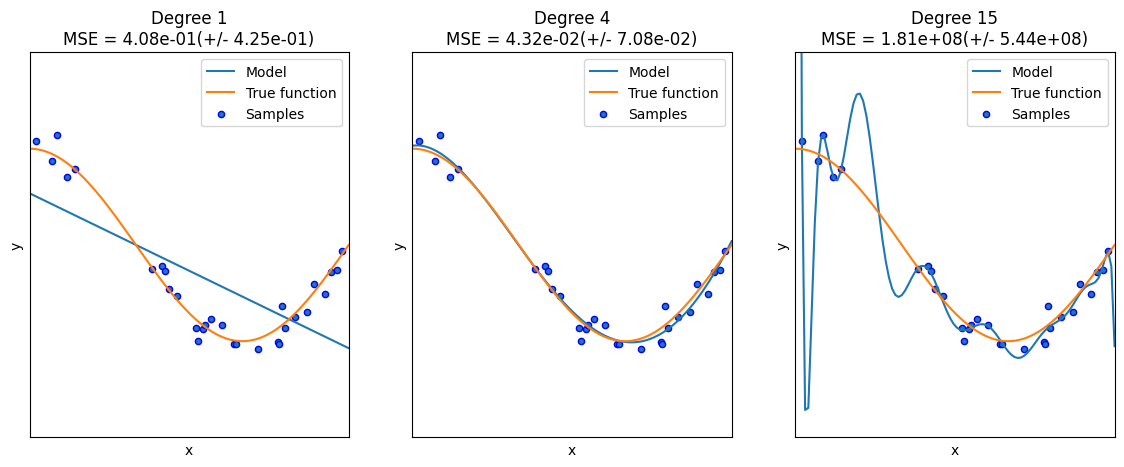

In [2]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.savefig('./figs/overfitting-overview.png')
plt.show()


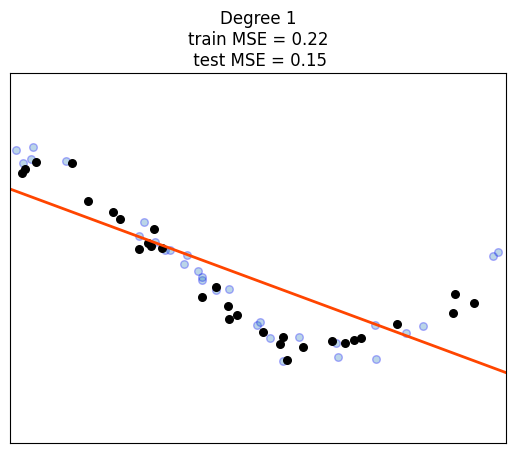

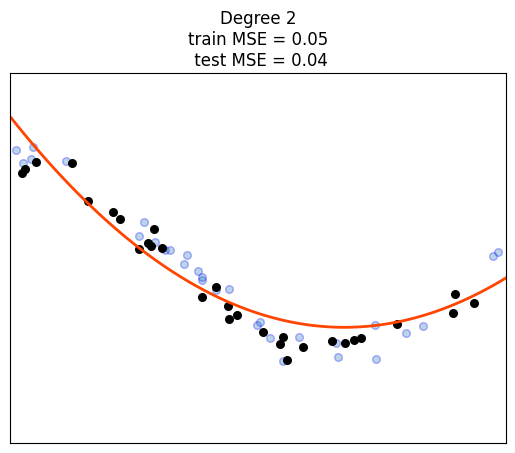

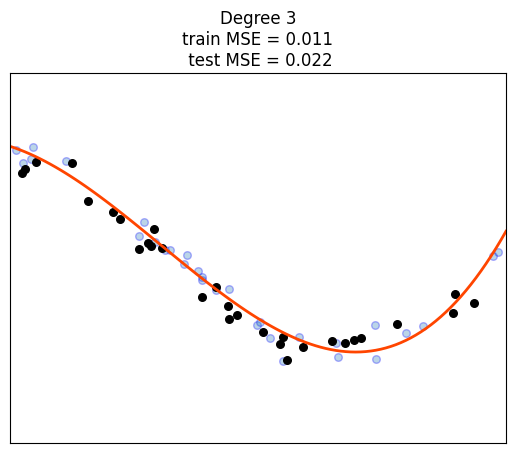

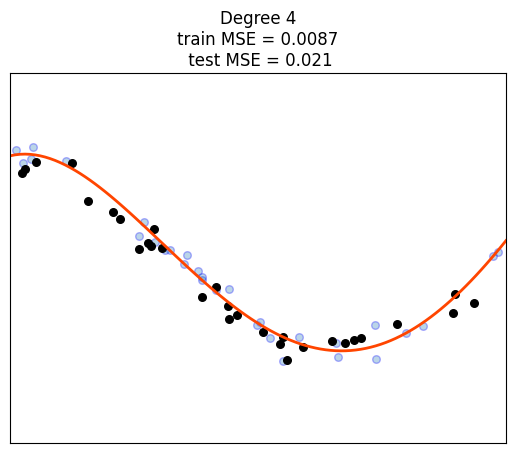

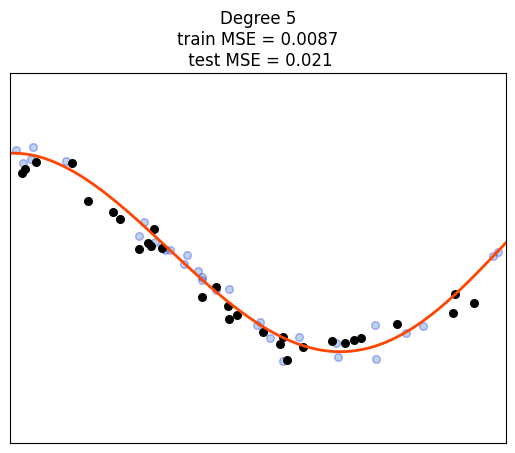

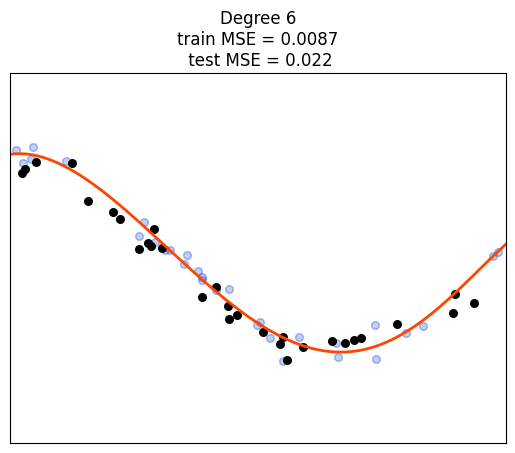

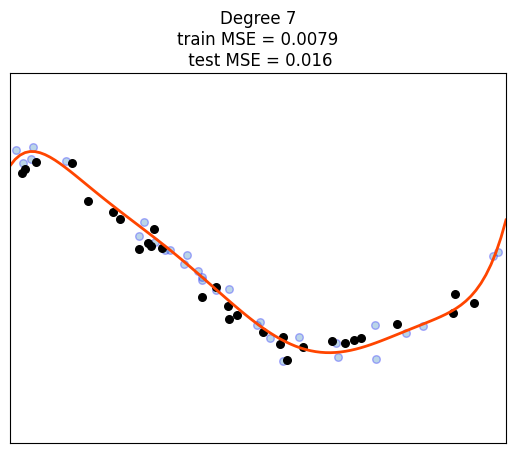

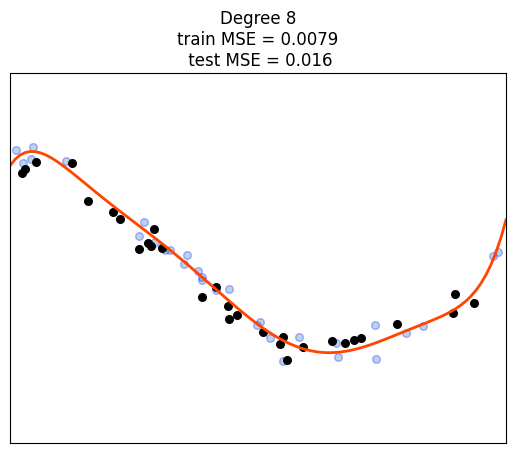

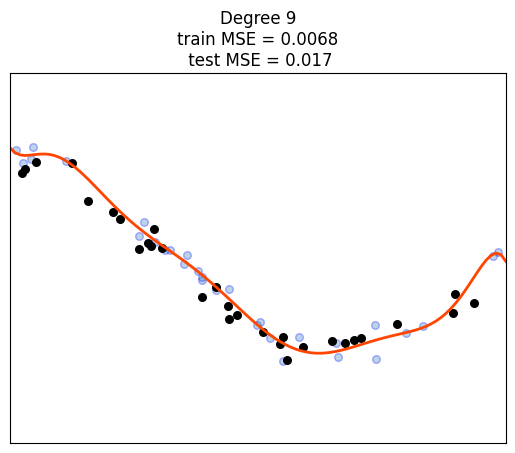

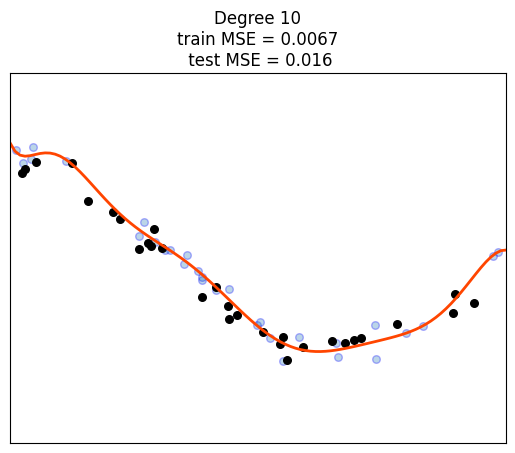

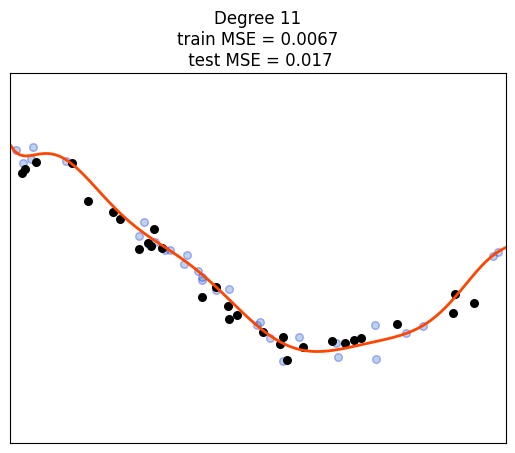

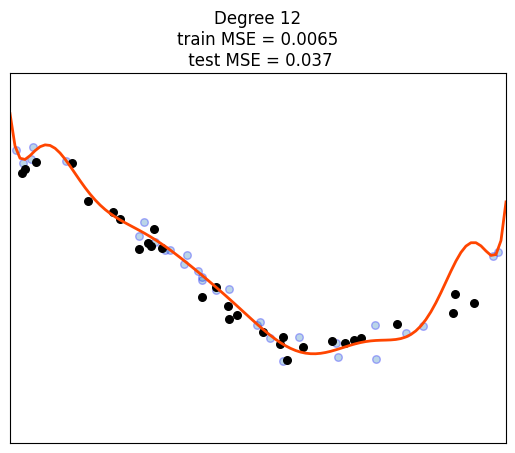

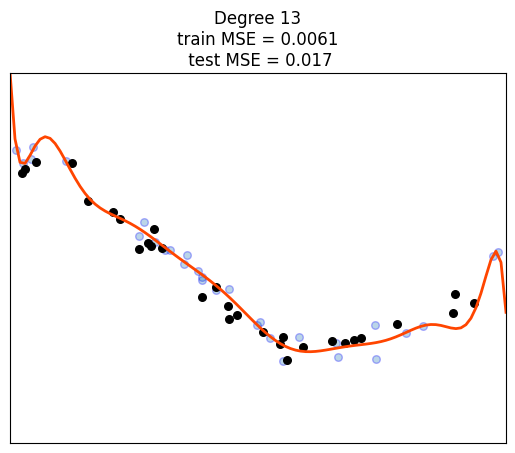

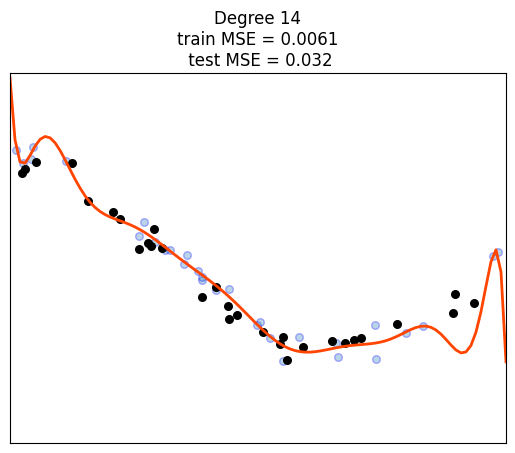

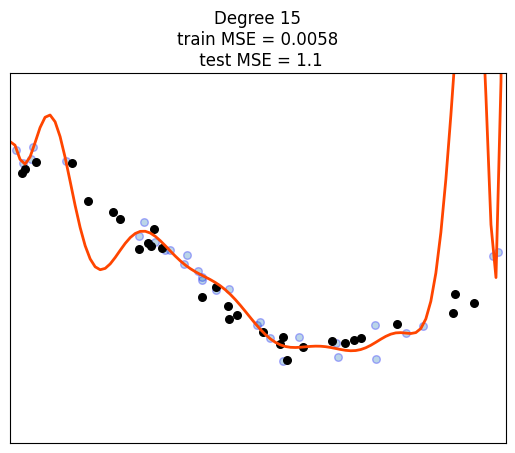

In [38]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)



n_samples = 30
degrees = range(1,16)

X = np.sort(np.random.rand(n_samples))
np.random.seed(0)
y = true_fun(X) + np.random.randn(n_samples) * 0.1
np.random.seed(3)
X_test = np.sort(np.random.rand(n_samples))
y_test = true_fun(X_test) + np.random.randn(n_samples) * 0.1
test_mse = []
train_mse = []

for i in range(len(degrees)):
    fig, ax = plt.subplots(1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    # scores = cross_val_score(
    #     pipeline, X[:, np.newaxis], y_test, scoring="neg_mean_squared_error", cv=10
    # )
    SE = np.square(y_test - pipeline.predict(X_test[:, np.newaxis]))
    MSE = np.mean(SE)
    test_mse.append(MSE)
    train_SE = np.square(y - pipeline.predict(X[:, np.newaxis]))
    train_MSE = np.mean(train_SE)
    train_mse.append(train_MSE)
    X_plot = np.linspace(0, 1, 100)
    plt.plot(X_plot, pipeline.predict(X_plot[:, np.newaxis]), lw=2, c='orangered')
    plt.scatter(X, y, edgecolor="b", s=30, alpha=.3)
    plt.scatter(X_test, y_test, facecolor="k", s=30)
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title(f"Degree {degrees[i]}\ntrain MSE = {train_MSE:.2}\n test MSE = {MSE:.2}")
    plt.savefig(f'./figs/overfitting{i}.png')




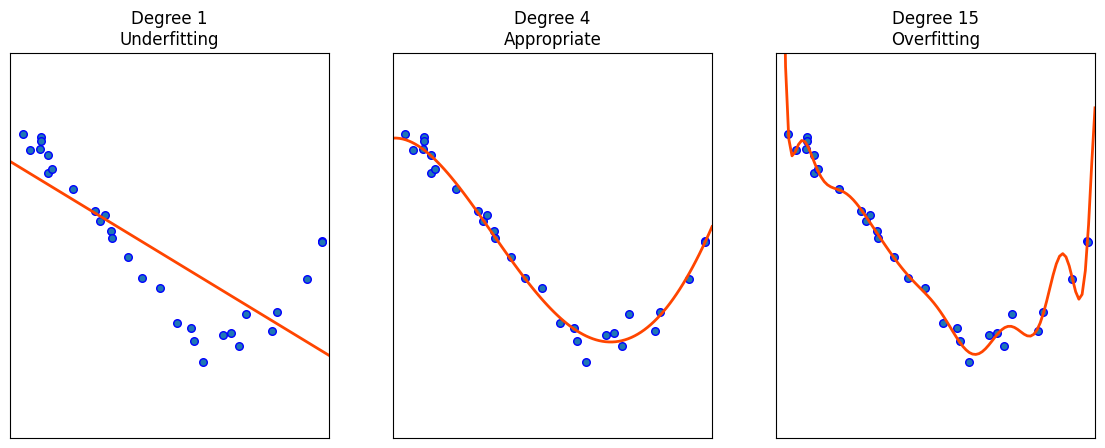

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)



n_samples = 30
degrees = [1, 4, 15]
subtitle = ['Underfitting','Appropriate','Overfitting']

X = np.sort(np.random.rand(n_samples))
np.random.seed(0)
y = true_fun(X) + np.random.randn(n_samples) * 0.1
np.random.seed(42)
y_test = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), lw=2, c='orangered')
    # plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=30)
    # plt.xlabel("x")
    # plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title(f"Degree {degrees[i]}\n{subtitle[i]}")
plt.savefig('./figs/overfitting-overview.png')
plt.show()
